In [2]:
import numpy as np 

import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs 



In [3]:
ds = xr.open_mfdataset("/project/amp/jcaron/CPC_Tminmax/tmax.*.nc")
tmax = ds['tmax'].compute()

In [4]:
tmax_avg_by_month = tmax.groupby('time.month').mean(dim='time')

/project/amp/brianpm/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
month_names = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
lons, lats = np.meshgrid(ds['lon'], ds['lat'])  # this creates arrays of longitude and latitude

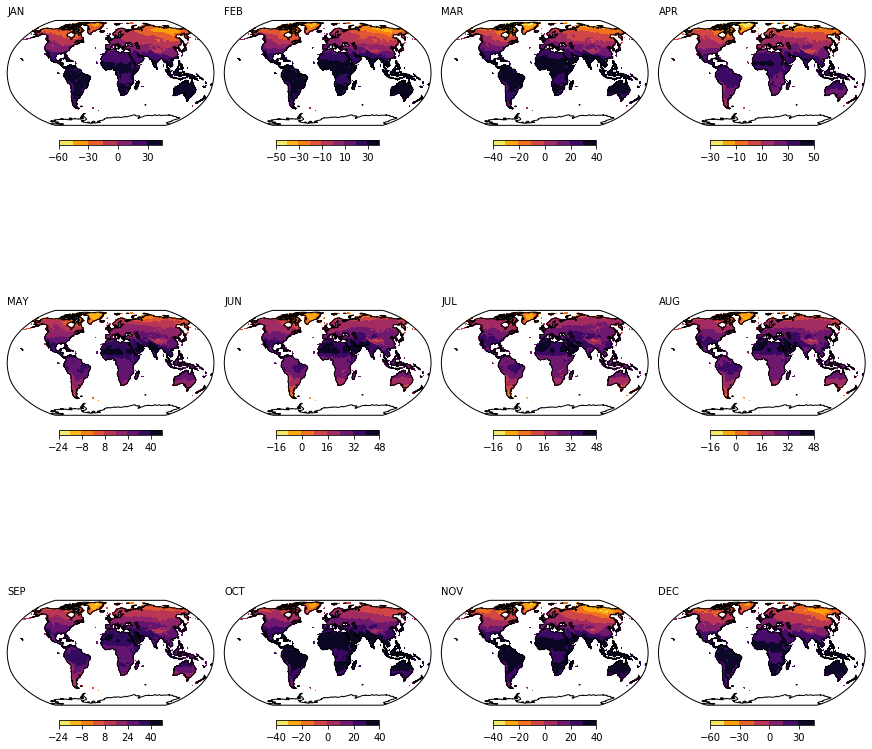

In [6]:
fig, ax = plt.subplots(figsize=(12,12), nrows=3, ncols=4, subplot_kw={"projection":ccrs.Robinson()}, constrained_layout=True)

for i, a in enumerate(ax.ravel()):
    im = a.contourf(lons, lats, tmax_avg_by_month.isel(month=i), transform=ccrs.PlateCarree(), cmap='inferno_r')
    a.coastlines()
    cbar = fig.colorbar(im, ax=a, shrink=0.5, orientation='horizontal')
    # reduce ticks:
    clr_ticks = cbar.get_ticks()
    cbar.set_ticks(clr_ticks[::2])  
    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    a.set_global()
    a.set_title(month_names[i], loc='left', fontsize=10)



['_A', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_solids', '_boundaries', '_central_N', '_config_axes', '_edges', '_extend_lower', '_extend_upper', '_extended_N', '_find_range', '_get_extension_lengths', '_get_ticker_locator_formatter', '_inside', '_label', '_labelkw', '_locate', '_manual_tick_data_values', '_mesh', '_outline', '_patch_ax', '_process_values', '_proportional_y', '_set_label', '_slice_dict', '_ticker', '_uniform_y', '_use_auto_colorbar_locator', '_values', '_y', 'add_checker', 'add_lines', 'alpha', 'autoscale', 'autoscale_None', 'ax', 'boundaries', 'callbacksSM', 'changed', 'check_update', 'cmap', 'colorbar', 'config_axis', 'dividers', 'draw_all', 'drawedges', 'extend',

Text(0.0, 1.0, 'JUL')

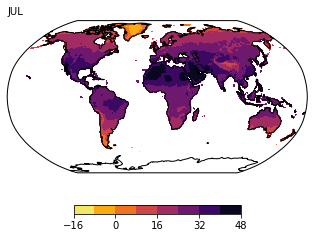

In [8]:
fig0, ax0 = plt.subplots(subplot_kw={"projection":ccrs.Robinson()})

im0 = ax0.contourf(lons, lats, tmax_avg_by_month.isel(month=6), transform=ccrs.PlateCarree(), cmap='inferno_r')
ax0.coastlines()
cbar0 = fig0.colorbar(im0, ax=ax0, shrink=0.5, orientation='horizontal')
print(dir(cbar0))
# reduce ticks:
clr_ticks = cbar0.get_ticks()
print(clr_ticks)
cbar0.set_ticks(clr_ticks[::2])  
# # make the map global rather than have it zoom in to
# # the extents of any plotted data
ax0.set_global()
ax0.set_title(month_names[6], loc='left', fontsize=10)




In [7]:
ak = tmax.sel(lat=70, lon=(360-156), method='nearest')
Novosibirsk = tmax.sel(lat=55, lon=83, method='nearest')

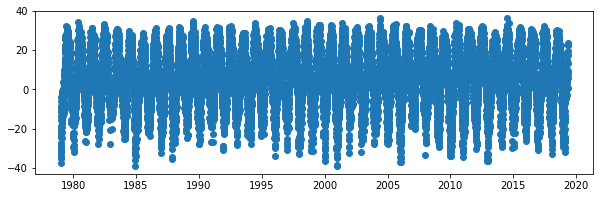

In [27]:
fig1, ax1 = plt.subplots(figsize=(10,3))
ax1.plot_date(Novosibirsk['time'], Novosibirsk, fmt='o', tz=None, xdate=True, ydate=False)

In [17]:
# deseasonalize
# this constructs the daily climatology
avg_year = tmax.groupby('time.dayofyear').mean(dim='time')
print(avg_year)

<xarray.DataArray 'tmax' (dayofyear: 366, lat: 360, lon: 720)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * lat        (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon        (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366


In [19]:
avg_year.shape

(366, 360, 720)

In [22]:
deseasoned = tmax.groupby('time.dayofyear') - avg_year

In [31]:
threeday_mean = deseasoned.rolling(time=3, center=True).mean()

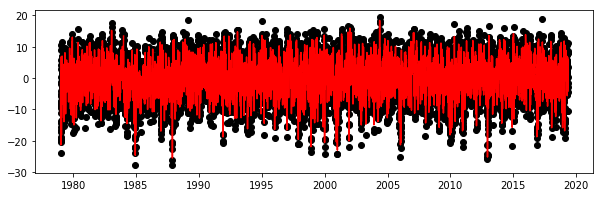

In [34]:
# look at the daily anomalies for Novosibirsk
fig2, ax2 = plt.subplots(figsize=(10,3))
ax2.plot_date(deseasoned['time'], deseasoned.sel(lat=55, lon=83, method='nearest'), 'ok', tz=None, xdate=True, ydate=False)
ax2.plot_date(threeday_mean['time'], threeday_mean.sel(lat=55, lon=83, method='nearest'), '-r', tz=None, xdate=True, ydate=False)



(array([0.00037299, 0.00012433, 0.00037299, 0.00037299, 0.00037299,
        0.00043515, 0.00093247, 0.00099463, 0.00161628, 0.00273525,
        0.00372988, 0.00397854, 0.00540833, 0.00727327, 0.01255728,
        0.01622498, 0.02269012, 0.03356894, 0.04419911, 0.05458061,
        0.06402965, 0.0706191 , 0.07963299, 0.07882485, 0.07509496,
        0.07497063, 0.06371881, 0.05358598, 0.0433288 , 0.03437708,
        0.02306311, 0.01578983, 0.01025718, 0.00621647, 0.00348122,
        0.00161628, 0.00074598, 0.00031082, 0.        , 0.00012433]),
 array([-25.45989   , -24.363794  , -23.267698  , -22.171604  ,
        -21.075508  , -19.979412  , -18.883316  , -17.787222  ,
        -16.691126  , -15.59503   , -14.498934  , -13.402839  ,
        -12.306743  , -11.210648  , -10.114552  ,  -9.018456  ,
         -7.9223604 ,  -6.826265  ,  -5.7301693 ,  -4.6340737 ,
         -3.5379782 ,  -2.4418826 ,  -1.3457869 ,  -0.24969134,
          0.84640425,   1.9424999 ,   3.0385954 ,   4.134691  ,
      

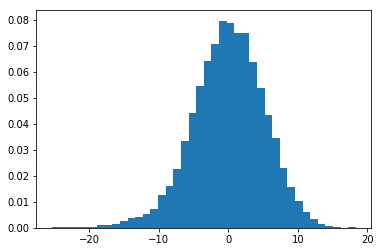

In [37]:
plt.hist(threeday_mean.sel(lat=55, lon=83, method='nearest'), density=True, bins=40)

In [57]:
# you might want to do something simple, like construct a binary "mask" with
# 1 being above some threshold and 0 otherwise:
ts = threeday_mean.sel(lat=55, lon=83, method='nearest')
ts_std = ts.std()
# print(ts_std) # 5.2
warm_mask = np.where(ts > (2*ts_std), 1, 0)
warm_mask_xr = xr.DataArray(warm_mask, coords=ts.coords, dims=ts.dims)

In [58]:
# alternative, just keep the data where we match the condition
wd = np.where(ts > (2*ts_std), ts, np.nan)
warm_data = xr.DataArray(wd, coords=ts.coords, dims=ts.dims)

Text(0.5, 1.0, '2$\\sigma$ events')

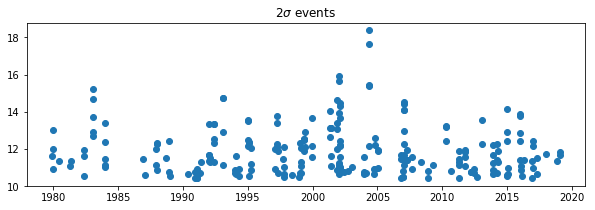

In [60]:
fig3, ax3 = plt.subplots(figsize=(10,3))
ax3.plot_date(warm_data['time'], warm_data, fmt='o', tz=None, xdate=True, ydate=False)
ax3.set_title("2$\sigma$ events")